<a href="https://colab.research.google.com/github/utkuyucel/Data-Analysis/blob/main/Data_Analysis_w_Pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Authentication Phase
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))
  
# Then move kaggle.json into the folder where the API expects to find it.
!mkdir -p ~/.kaggle/ && mv kaggle.json ~/.kaggle/ && chmod 600 ~/.kaggle/kaggle.json

Saving kaggle.json to kaggle.json
User uploaded file "kaggle.json" with length 67 bytes


In [ ]:
# Get dataset from kaggle
!kaggle datasets download "prachi13/customer-analytics" && unzip customer-analytics.zip

  0% 0.00/121k [00:00<?, ?B/s]
100% 121k/121k [00:00<00:00, 79.4MB/s]
Archive:  customer-analytics.zip
  inflating: Train.csv               


In [ ]:
df = pd.read_csv("Train.csv")
df.head()

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1


In [ ]:
# Checking that dataset has any NaN values.
print(df.isna().sum())

ID                     0
Warehouse_block        0
Mode_of_Shipment       0
Customer_care_calls    0
Customer_rating        0
Cost_of_the_Product    0
Prior_purchases        0
Product_importance     0
Gender                 0
Discount_offered       0
Weight_in_gms          0
Reached.on.Time_Y.N    0
dtype: int64


In [ ]:
df.head(5)

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1


In [ ]:
#Q: Is there any correlations between shipping type and customer rating?
#A: No, there is no correlation between them.
shipment_avg = df.groupby("Mode_of_Shipment").Customer_rating.mean()

shipment_avg

Mode_of_Shipment
Flight    2.982555
Road      2.995455
Ship      2.991289
Name: Customer_rating, dtype: float64

In [ ]:
#Q: Is there any correlations between shipping type and product_importance?
product_importance = df.groupby(["Mode_of_Shipment", "Product_importance"])[["ID"]].count()

product_importance

ID
Mode_of_Shipment Product_importance      
Flight           high                 163
                 low                  838
                 medium               776
Road             high                 158
                 low                  857
                 medium               745
Ship             high                 627
                 low                 3602
                 medium              3233

                    ID
Mode_of_Shipment      
Flight            1777
Road              1760
Ship              7462


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  # Remove the CWD from sys.path while we load stuff.


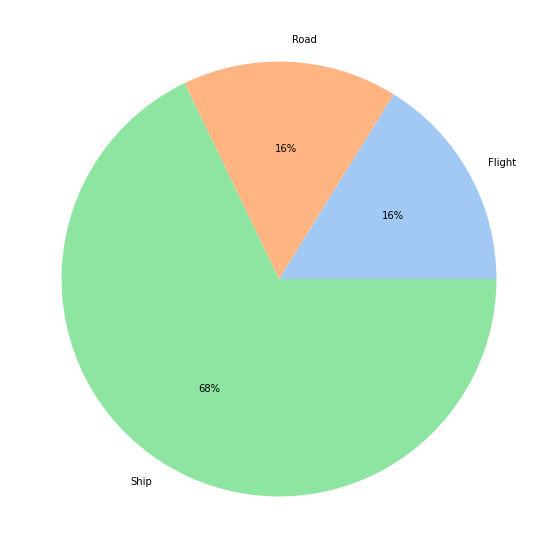

In [ ]:
# Drawing piechart of mode of shipments by products

full_products = df.groupby(["Mode_of_Shipment"])[["ID"]].count()
shipment_labels = ["Flight", "Road", "Ship"]
print(full_products)

def plot_pie(input_array: np.array, labels: list, size: int, palette_color: str) -> None:
  colors = sns.color_palette(palette_color)
  plt.rcParams["figure.figsize"] = (size,size)
  plt.pie(input_array, labels = labels, colors = colors, autopct = "%.f%%")
  plt.show()


plot_pie(full_products, shipment_labels, 10, "pastel")



In [ ]:
#Q: Is there any correlations between shipping type and the cost of the product?

cost_and_shipping_type = df.groupby(["Mode_of_Shipment", "Product_importance"])
cost_and_type = cost_and_shipping_type[["Cost_of_the_Product"]].sum()

count_id_and_type = cost_and_shipping_type[["ID"]].count()

merged = cost_and_type.join(count_id_and_type)

merged

Cost_of_the_Product    ID
Mode_of_Shipment Product_importance                           
Flight           high                              33018   163
                 low                              176714   838
                 medium                           162206   776
Road             high                              32082   158
                 low                              180331   857
                 medium                           158024   745
Ship             high                             128170   627
                 low                              766236  3602
                 medium                           675174  3233

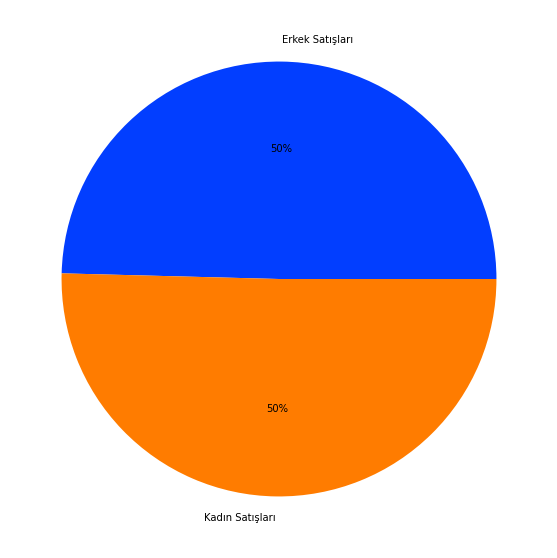

In [ ]:
# Do men or women buy more product?

total = int(df["ID"].count())

men_or_women = df.groupby("Gender").count()

men_or_women_by_id = men_or_women["ID"]

men_total =  men_or_women_by_id["M"]
women_total = men_or_women_by_id["F"]

men_total_percentage = (men_total / total) * 100
women_total_percentage = (women_total / total) * 100

pie = np.array([men_total_percentage, women_total_percentage])

labels = ["Erkek Satışları", "Kadın Satışları"]


def plot_pie(input_array: np.array, labels: list, size: int, palette_color: str) -> None:
  colors = sns.color_palette(palette_color)
  plt.rcParams["figure.figsize"] = (size,size)
  plt.pie(input_array, labels = labels, colors = colors, autopct = "%.f%%")
  plt.show()


plot_pie(pie, labels, 10, "bright")

